In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#set the common figure size
plt.rcParams['figure.figsize']=(10,8)

In [ ]:
dataframe = pd.read_csv('/content/drive/MyDrive/fake_job_postings.csv')

In [ ]:
dataframe.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [ ]:
dataframe.shape

(17880, 18)

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [ ]:
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
job_id,17880.0,8940.500000,5161.655742,1.0,4470.75,8940.5,13410.25,17880.0
telecommuting,17880.0,0.042897,0.202631,0.0,0.00,0.0,0.00,1.0
has_company_logo,17880.0,0.795302,0.403492,0.0,1.00,1.0,1.00,1.0
has_questions,17880.0,0.491723,0.499945,0.0,0.00,0.0,1.00,1.0
fraudulent,17880.0,0.048434,0.214688,0.0,0.00,0.0,0.00,1.0


In [ ]:
dataframe.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [ ]:
#df['department'].isnull().sum()
len(dataframe['department'])

17880

In [ ]:
#percentage of null values for each features
for i in dataframe.columns.tolist():
    if dataframe[i].isnull().sum()>0:
        print('Feature',i,': {:.2f}%'.format(dataframe[i].isnull().sum()*100/len(dataframe[i])))

Feature location : 1.94%
Feature department : 64.58%
Feature salary_range : 83.96%
Feature company_profile : 18.50%
Feature description : 0.01%
Feature requirements : 15.07%
Feature benefits : 40.32%
Feature employment_type : 19.41%
Feature required_experience : 39.43%
Feature required_education : 45.33%
Feature industry : 27.42%
Feature function : 36.10%


In [ ]:
dataframe['title'].value_counts()

English Teacher Abroad                                311
Customer Service Associate                            146
Graduates: English Teacher Abroad (Conversational)    144
English Teacher Abroad                                 95
Software Engineer                                      86
                                                     ... 
Title Closer/Agent                                      1
Field Sales Coordinator                                 1
Production Assistant, Indonesian Service                1
Digital Manager                                         1
Operations Contract                                     1
Name: title, Length: 11231, dtype: int64

In [ ]:
dataframe['location'].value_counts()

GB, LND, London          718
US, NY, New York         658
US, CA, San Francisco    472
GR, I, Athens            464
US, ,                    339
                        ... 
US, PA, Towanda            1
BE, BRU, Auderghem         1
US, GA, Georgia            1
NO, , Work from home       1
NZ, N, North Shore         1
Name: location, Length: 3105, dtype: int64

In [ ]:
dataframe['department'].value_counts()

Sales                           551
Engineering                     487
Marketing                       401
Operations                      270
IT                              225
                               ... 
Social Media                      1
SMRA                              1
Software Products - Delivery      1
Supply Chain                      1
Back Office                       1
Name: department, Length: 1337, dtype: int64

In [ ]:
dataframe['fraudulent'].value_counts()

0    17014
1      866
Name: fraudulent, dtype: int64

**There are 866 fake job profiles**

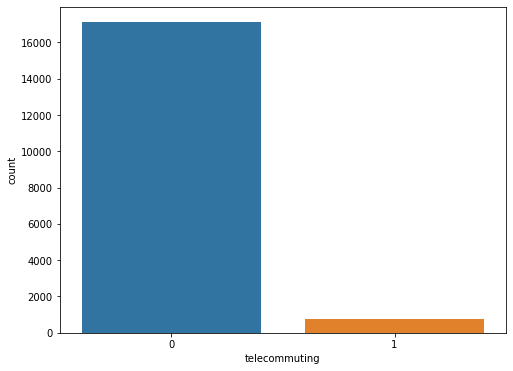

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='telecommuting',data=dataframe)

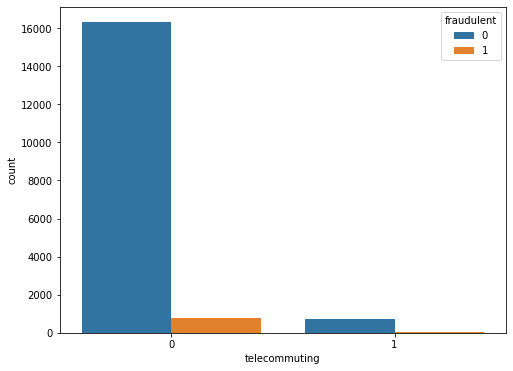

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='telecommuting',hue='fraudulent',data=dataframe)

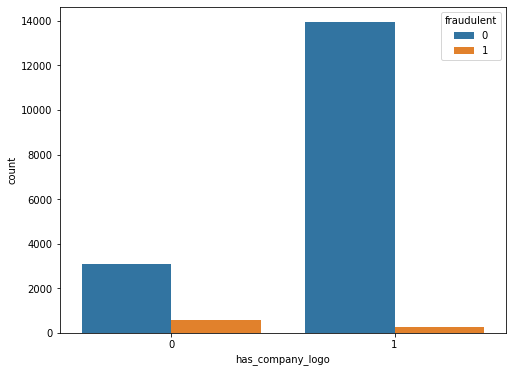

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='has_company_logo',hue='fraudulent',data=dataframe)

In [ ]:
dataframe['has_questions'].value_counts()

0    9088
1    8792
Name: has_questions, dtype: int64

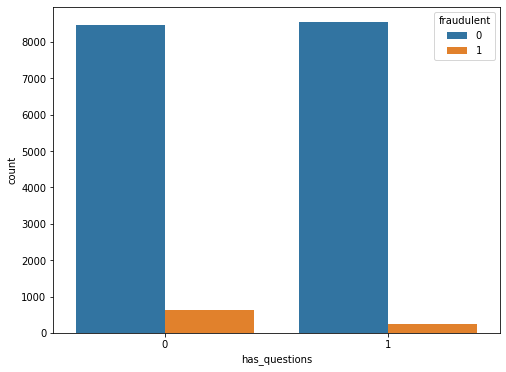

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='has_questions',hue='fraudulent',data=dataframe)

In [ ]:
dataframe['employment_type'].value_counts()

Full-time    11620
Contract      1524
Part-time      797
Temporary      241
Other          227
Name: employment_type, dtype: int64

In [ ]:
dataframe['employment_type'].isnull().sum()

3471

In [ ]:
dataframe.dropna(subset=['employment_type'],axis=0,inplace=True)

In [ ]:
dataframe.shape

(14409, 18)

In [ ]:
dataframe['required_experience'].value_counts()

Mid-Senior level    3791
Entry level         2628
Associate           2277
Not Applicable      1013
Director             387
Internship           361
Executive            140
Name: required_experience, dtype: int64

In [ ]:
dataframe.dropna(subset=['required_experience'],axis=0,inplace=True)

In [ ]:
dataframe['required_education'].value_counts()

Bachelor's Degree                    4199
High School or equivalent            1850
Unspecified                          1316
Master's Degree                       328
Associate Degree                      250
Certification                         146
Some College Coursework Completed      95
Professional                           67
Vocational                             43
Doctorate                              25
Vocational - Degree                     6
Some High School Coursework             5
Vocational - HS Diploma                 4
Name: required_education, dtype: int64

In [ ]:
dataframe.dropna(subset=['required_education'],axis=0,inplace=True)

In [ ]:
#removing unnecessary columns
features=['job_id','title','location','department','salary_range','company_profile','description','requirements','benefits','industry','function']

In [ ]:
dataframe.drop(features,axis=1,inplace=True)

In [ ]:
dataframe.shape

(8334, 7)

In [ ]:
dataframe.head()

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,fraudulent
3,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,0
4,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,0
6,0,1,1,Full-time,Mid-Senior level,Master's Degree,0
9,0,1,0,Part-time,Entry level,High School or equivalent,0
10,0,0,0,Full-time,Mid-Senior level,Bachelor's Degree,0


In [ ]:
dataframe.dtypes

telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
fraudulent              int64
dtype: object

In [ ]:
categorical=dataframe.select_dtypes('object').columns.tolist()
categorical

['employment_type', 'required_experience', 'required_education']

In [ ]:
#converting the categorical values into numerical values
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for x in dataframe.columns:
    dataframe[x] = encoder.fit_transform(dataframe[x])
dataframe.head()

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,fraudulent
3,0,1,0,1,5,1,0
4,0,1,1,1,5,1,0
6,0,1,1,1,5,5,0
9,0,1,0,3,2,4,0
10,0,0,0,1,5,1,0


In [ ]:
dataframe.reset_index(drop=True,inplace=True)

In [ ]:
dataframe.shape

(8334, 7)

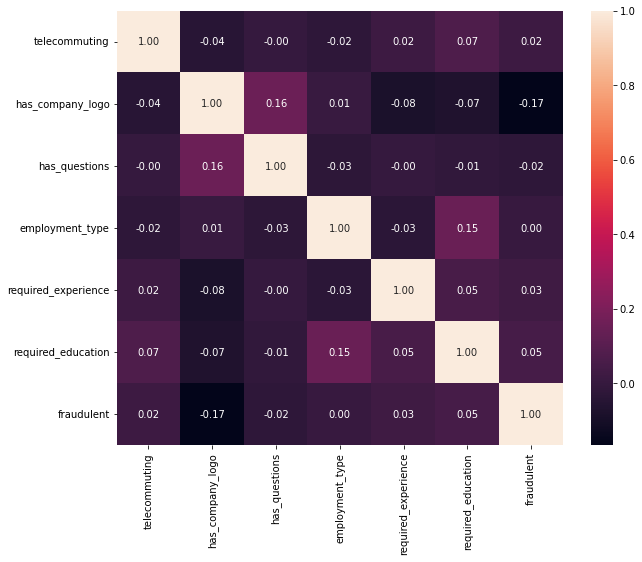

In [ ]:
sns.heatmap(dataframe.corr(),annot=True,fmt='.2f')

In [ ]:
dataframe['fraudulent'].value_counts()

0    7974
1     360
Name: fraudulent, dtype: int64

**The dataset is an imbalanced dataset. So RandomOverSampling should be applied on the dataset**

In [ ]:
#dividing the independent and dependent dataset
X=dataframe.drop('fraudulent',axis=1)
y=dataframe['fraudulent']

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier()
etc.fit(X,y)
etc.feature_importances_
score=pd.Series(etc.feature_importances_)
score.index=X.columns

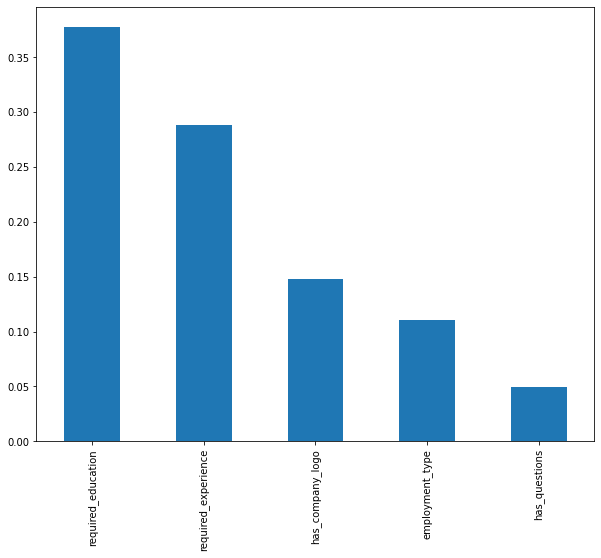

In [ ]:
score.nlargest().plot(kind='bar')

In [ ]:
#normalize the dataset
from sklearn.preprocessing import MinMaxScaler

# build the scaler model
scaler = MinMaxScaler()# fit using the train set
scaler.fit(X)# transform the test test
X_norm = scaler.transform(X)


In [ ]:
print(X_norm)

[[0.         1.         0.         0.25       0.83333333 0.08333333]
 [0.         1.         1.         0.25       0.83333333 0.08333333]
 [0.         1.         1.         0.25       0.83333333 0.41666667]
 ...
 [0.         0.         0.         0.25       0.83333333 0.08333333]
 [0.         1.         1.         0.25       0.83333333 0.08333333]
 [0.         0.         1.         0.         1.         0.5       ]]


# Random Over Sampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler
rs = RandomOverSampler(sampling_strategy='minority')
X_over, y_over=rs.fit_resample(X_norm,y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_over,y_over,test_size=0.40,random_state=42)

# Models

In [ ]:
# Classification Metrics
from sklearn.utils.multiclass import unique_labels
import seaborn as sns
def PlotConfusionMatrix(yTest, Prediction):
    labels = unique_labels(yTest)
    columns = [f'Predicted: {label}' for label in labels]
    index = [f'Actual: {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true=yTest, y_pred=Prediction), columns=columns, index=index)
    return table

def HeatMap(yTest, Prediction):
    labels = unique_labels(yTest)
    columns = [f'Predicted: {label}' for label in labels]
    index = [f'Actual: {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true=yTest, y_pred=Prediction), columns=columns, index=index)
    return sns.heatmap(table, annot=True, fmt='d',cmap='viridis')

def Results(yTest, Prediction):    
    print("Overall Accuracy", metrics.accuracy_score(yTest, Prediction))
    print('\n')
    cm = confusion_matrix(yTest, Prediction)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    class_accuracies = cm.diagonal()
    for accuracy in range(len(class_accuracies)):
        print(f'Class #{accuracy} Accuracy {class_accuracies[accuracy]}')
    print('\n')
    print(classification_report(yTest, Prediction))

In [ ]:
print(X_train)

[[0.         1.         0.         0.         0.83333333 0.08333333]
 [0.         0.         0.         0.25       0.         0.08333333]
 [0.         1.         1.         0.25       0.83333333 0.33333333]
 ...
 [0.         1.         0.         0.75       0.33333333 0.33333333]
 [0.         1.         1.         0.25       0.16666667 0.41666667]
 [0.         1.         1.         0.25       1.         0.75      ]]


In [ ]:
print(y_train)

6836     0
9418     1
15083    1
4989     0
10633    1
        ..
13418    1
5390     0
860      0
15795    1
7270     0
Name: fraudulent, Length: 9568, dtype: int64


In [ ]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB

Classifier = MultinomialNB()
Classifier.fit(X_train, y_train)
prediction = Classifier.predict(X_test)

Overall Accuracy 0.6037617554858934


Class #0 Accuracy 0.7435095401939318
Class #1 Accuracy 0.46339930882814956


              precision    recall  f1-score   support

           0       0.58      0.74      0.65      3197
           1       0.64      0.46      0.54      3183

    accuracy                           0.60      6380
   macro avg       0.61      0.60      0.60      6380
weighted avg       0.61      0.60      0.60      6380

None
           Predicted: 0  Predicted: 1
Actual: 0          2377           820
Actual: 1          1708          1475
AxesSubplot(0.125,0.125;0.62x0.755)


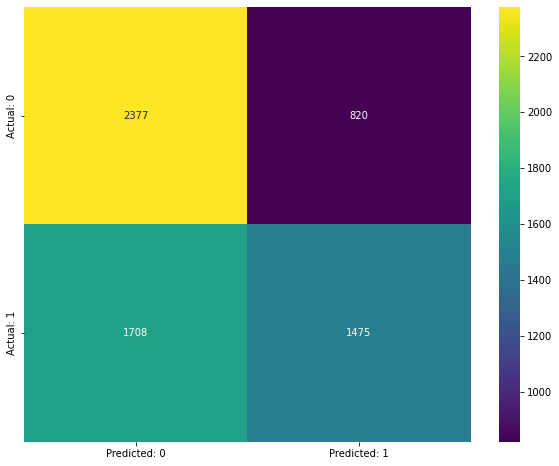

In [ ]:
print(Results(y_test, prediction))
print(PlotConfusionMatrix(y_test, prediction))
print(HeatMap(y_test, prediction))

In [ ]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

Classifier = GaussianNB()
Classifier.fit(X_train, y_train)
prediction = Classifier.predict(X_test)

Overall Accuracy 0.6344827586206897


Class #0 Accuracy 0.8142008132624335
Class #1 Accuracy 0.4539742381401194


              precision    recall  f1-score   support

           0       0.60      0.81      0.69      3197
           1       0.71      0.45      0.55      3183

    accuracy                           0.63      6380
   macro avg       0.65      0.63      0.62      6380
weighted avg       0.65      0.63      0.62      6380

None
           Predicted: 0  Predicted: 1
Actual: 0          2603           594
Actual: 1          1738          1445
AxesSubplot(0.125,0.125;0.62x0.755)


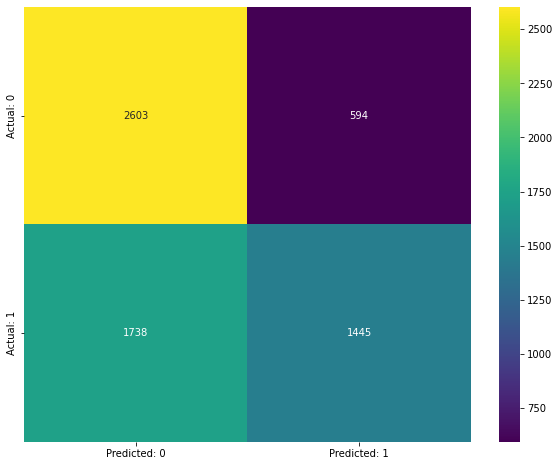

In [ ]:
print(Results(y_test, prediction))
print(PlotConfusionMatrix(y_test, prediction))
print(HeatMap(y_test, prediction))

In [ ]:
# Categorical Naive Bayes
from sklearn.naive_bayes import CategoricalNB

Classifier = CategoricalNB()
Classifier.fit(X_train, y_train)
prediction = Classifier.predict(X_test)

Overall Accuracy 0.6371473354231975


Class #0 Accuracy 0.8160775727244292
Class #1 Accuracy 0.4574300973923971


              precision    recall  f1-score   support

           0       0.60      0.82      0.69      3197
           1       0.71      0.46      0.56      3183

    accuracy                           0.64      6380
   macro avg       0.66      0.64      0.62      6380
weighted avg       0.66      0.64      0.63      6380

None
           Predicted: 0  Predicted: 1
Actual: 0          2609           588
Actual: 1          1727          1456
AxesSubplot(0.125,0.125;0.62x0.755)


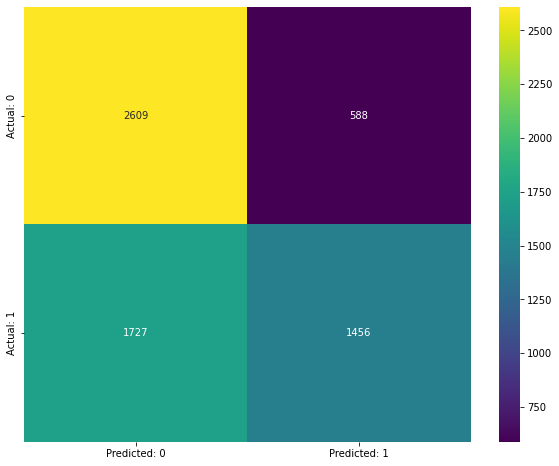

In [ ]:
print(Results(y_test, prediction))
print(PlotConfusionMatrix(y_test, prediction))
print(HeatMap(y_test, prediction))

In [ ]:
from sklearn.tree import DecisionTreeClassifier

Classifier = DecisionTreeClassifier()
Classifier.fit(X_train, y_train)
prediction = Classifier.predict(X_test)

Overall Accuracy 0.831974921630094


Class #0 Accuracy 0.7863622145761652
Class #1 Accuracy 0.8777882500785422


              precision    recall  f1-score   support

           0       0.87      0.79      0.82      3197
           1       0.80      0.88      0.84      3183

    accuracy                           0.83      6380
   macro avg       0.83      0.83      0.83      6380
weighted avg       0.83      0.83      0.83      6380

None
           Predicted: 0  Predicted: 1
Actual: 0          2514           683
Actual: 1           389          2794
AxesSubplot(0.125,0.125;0.62x0.755)


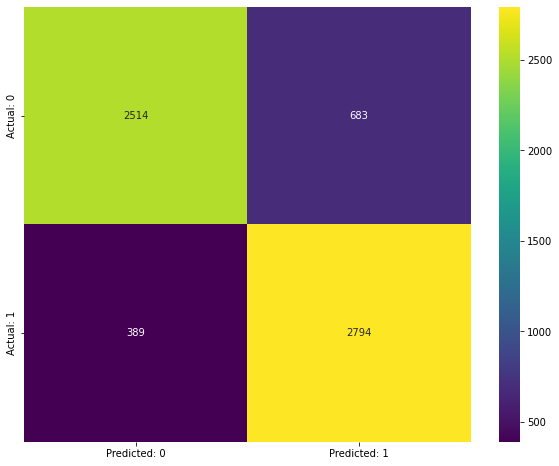

In [ ]:
print(Results(y_test, prediction))
print(PlotConfusionMatrix(y_test, prediction))
print(HeatMap(y_test, prediction))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

Classifier = RandomForestClassifier()
Classifier.fit(X_train, y_train)
prediction = Classifier.predict(X_test)

Overall Accuracy 0.8316614420062696


Class #0 Accuracy 0.7857366280888333
Class #1 Accuracy 0.8777882500785422


              precision    recall  f1-score   support

           0       0.87      0.79      0.82      3197
           1       0.80      0.88      0.84      3183

    accuracy                           0.83      6380
   macro avg       0.83      0.83      0.83      6380
weighted avg       0.83      0.83      0.83      6380

None
           Predicted: 0  Predicted: 1
Actual: 0          2512           685
Actual: 1           389          2794
AxesSubplot(0.125,0.125;0.62x0.755)


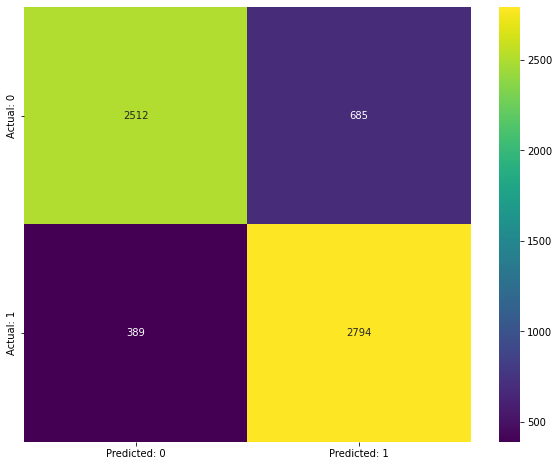

In [ ]:
print(Results(y_test, prediction))
print(PlotConfusionMatrix(y_test, prediction))
print(HeatMap(y_test, prediction))